# Table of Content<a class="anchor" id="table-of-content"></a>
* [1. Problem Introduction and Motivation](#problem-introduction)
* [2. Libraries and Custome Functions](#libraries)
* [3. Data Preparation and Modeling](#modeling)
* [4. Training and Testing Model](#train-test-model)
* [5. Machine Learning](#machine-learning)
* [6. References and Sources](#references-sources)

# 1.Problem Introduction and Motivation<a class="anchor" id="problem-introduction"></a>
* [Go to Top](#table-of-content)
<img src ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3ylTGhVpMiubpl-WG-fsFAQZum4dKBY7N2Vti2k5rj0G5emUzeID-BVFSIzTmFAMMmmw&usqp=CAU'/>
     
### Problem  Introduction and Motivation
>Hotels have to deal with a lot of bookings from customers everday. Each booking has different request and details for the hotels to cope with. What's more, once the booking procedure is completed doesn't mean it won't change in the future. Due to several kinds of reasons, it is still possible for the bookings to be canceled.
### Q & A
>**What is the prediction we are trying to make?**<br>
>We want to predict the cancellation of the hotel booking.<br><br>
>**Why is it important?  Who cares?**<br>
>Hotel might be interested in this prediction. With this prediction, hotels can take some action before the bookings was canceled to reduce the lost of time and money when the customers cancel their bookings.<br><br>
>**What are the possible actions that could be taken as a result of this work?**<br>
>Hotels can use this prediction model to increase the deposit for those customers who has a high probabiltiy to cancel their bookings in the future. What's more, they can also arrange the waiting list for customers based on the prediction results, for those rooms that are more likely to be canceled in the future, hotels can allow customer to be on the wating list for the rooms.<br><br>

# 2. Libraries and Custome Functions<a class="anchor" id="libraries"></a>
* [Go to Top](#table-of-content)

In [10]:
import pandas as pd
# pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with
# "relational" or "labeled" data both easy and intuituve.

import numpy as np
# numpy is a Python library used for working with arrays. Is also has functions for working in domain of linear 
# algebra, fourier transform, and matrices.

import math
# math module allows you to perform mathematical tasks on numbers.

import statsmodels.api as sm
# statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform 
# statistical tests. API stands for application programming interface, an API acts as a communication layer, or as 
# an interface that allows different systems to talk to each other without having to understand exactly what each 
# other does.

import pickle
# pickle is a module that is used for serializing and de-reserializing a Python object structure.

import matplotlib.pyplot as plt
# matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.

import seaborn as sns
# seaborn is a data visualization library for statistical graphic plotting in Python, and it is based on matplotlib.

import plotly.graph_objects as go
# plotly.graph_objects is a module that contains an automatically generated hierarchy of Python classes which 
# represent non-leaf nodes in this figure schema.

from sklearn.linear_model import LogisticRegression
# sklearn.linear_model is a machine learning package. It offers a set of fast tools for machine learning and 
# statistical modeling, such as classification, regression, clustering, and dimenstionality reduction, and we want
# to import LogisticRegression tool from sklearn.linear_model.

from sklearn.linear_model import LinearRegression
# the LinearRegression contains different functions for performing machine learning with linear models.

from sklearn.metrics import accuracy_score
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, the accuracy_score function calculates the accuracy score for a set of predicted labels against the 
# true labels.

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, and we want to use the functions we import to calculate mean absolute percentage error(MAPE), mean 
# absolute error(MAE), R2 score, and mean squared error(MSE).

from sklearn.model_selection import train_test_split
# train_test_split function of the sklearn.model_selection package splits array or matrices into random subsets
# for train and test data.

from sklearn.model_selection import cross_val_score 
# cross_val_score function will be used to perform the evaluation, taking dataset and cross-validation 
# configuration and returning a list of scores calculated for each fold.

from sklearn.model_selection import GridSearchCV
# GridSearchCV function is a technique for finding the optimal parameter values from a given set of  parameters
# in a grid.

pd.set_option('display.max_columns', None)
# Setting the max column number we want to display, the default is 10 and if we set the value as None, it will display
# all the columns.

# pd.set_option('display.max_rows', None)
# Setting the max row number we want to display, the default is 10 and if we set the value as None, it will display
# all the rows.

pd.options.display.float_format = '{:.2f}'.format
# ask pandas to display float values to two decimal places.

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
# NearestNeighbors function helps us finding he nearest neighbors between two sets of data, KNeighborsClassifier
# implements the k-nearest neighbors vote.

from sklearn import metrics
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance.

from sklearn.metrics import accuracy_score
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, the accuracy_score function calculates the accuracy score for a set of predicted labels against the 
# true labels.

from sklearn.metrics import confusion_matrix
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, confusion_matrix function compute the confusion matrix to evaluate the accuracy of a classification.

from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix function allows us to visualize the confusion matrix.

from sklearn import datasets
# datasets is a package that embeds some small toy datasets as introduced in the Getting Started section.

from sklearn import tree
# tree package allow us to build decision trees.

from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

from sklearn.tree import plot_tree
# plot_tree fucntion is intended to faciliate easy graphical investigation of the phylogenetic tree, as well as
# sample data.

from sklearn.ensemble import RandomForestClassifier
# sklearn.ensemble module includes two averaging algorithms based on randomized decision trees, the RandomForest 
# algorithm and the Extra_Trees method. RandomForestClassifier is a function that creates a set of decision trees 
# from a randomly selected subset of the training set.

%matplotlib inline
# matplotlib inline function makes the plots generated by matplotlib show in the IPython sjell that we are running
# and not in a seperate output window.

import matplotlib.pylab as plt
# pylab is a module that provides a Matlab like namespace by importing functions from the modules Numpy and Matplotlib.

from sklearn.preprocessing import binarize
# sklearn.preprocessing package provides several common utility functions and transformer classes to change raw 
# feature vectors into a representaion that is more suitable for the downstream estimators
# binarize function takes data in a normal format and converts to a binary format.

from sklearn.neural_network import MLPClassifier
# MLP stands for Multilayer Perception, MLPClassifier function optimize the log-loss function using LBFGS or
# stochastic gradient descent.

In [11]:
# Create a function for getting statistical values, it use dictionary to get the value of the of different measurements of 
# the data.
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)

In [12]:
# Create a function for training and testing data
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

In [13]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"Threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1": F1,
                          })

    # Let's look at our dataframe
    return result

# 3.Data Preparation and Modeling<a class="anchor" id="modeling"></a>
* [Go to Top](#table-of-content)

In [14]:
df = pd.read_csv('hotel_bookings.csv')
# df means data frame, the read_csv() function is used to retrieve data from from csv file, and this function is 
# in the pandas package so there is a pd. in front of the function.

df.info()
# Look at the information of the data frame.

df.tail()
# Look at the last 5 records of the data frame.

# df.head()
# Look at the first 5 records of the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.00,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.00,NaN,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.00,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.00,NaN,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.00,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.00,NaN,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.00,NaN,0,Transient,104.40,0,0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.00,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,NaN,0,Transient,151.20,0,2


In [15]:
# Further investigate the company column since the company value in top five and last five records are all NaN
# df1 = df.loc[df['company'].notnull()]
# df1

>**Initail evaluations and observations of the data**<br>
>>**Records:** 119390 (since starting from 0 to 119389)<br>
>>**Features in current data(total 30 features):** hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests.<br>
>>**Potential features that we can add in the future:**  deposit_amount, price_of_the_room, floor_of_the_room<br>
>>**Data Type:** Reasonable (the actual data type is same as we expected)<br>
>>**Target Feature:** is_canceled

<br><br>

| Feature                        | Explanation(impact on is_canceled)     | Actual Data Type | Expected Data Type |
|--------------------------------|-------------------------------------------|------------------|-----------------|
| hotel:    	                 | hotel's name(neutral)                     | object           | object          |
| is_canceled:      	         | the booking was canceled(1) or not(0)     | int64            | int             |
| lead_time:                     | days between entering date and arrival date(positive)| int64 | int             |
| arrival_date_year:             | year of arrival date(neutral)   	         | int64            | int             | 
| arrival_date_month: 	         | month of arrival date(neutral)            | object           | object          |
| arrival_date_week_number:      | week number of year for arrival date(neutral)| int64         | int             |
| arrival_date_day_of_month:     | day of arrival date(neutral)         	 | int64            | int             |
| stays_in_weekend_nights:       | number of weekend nights the guest stayed or booked to stay at the hotel(-)| int64 | int|
| stays_in_week_nights:          | number of week nights the guest stayed or booked to stay at the hotel(-)|   int64 | int|
| adults:                        | number of adults(neutral) 	             | int64            | int             |
| children:                      | number of children(neutral)               | float64          | float           |
| babies:                        | number of babies(neutral)           	     | int64            | int             |
| meal:    	                     | type of meal booked(neutral)              | object           | object          |
| country:                       | country of origin(neutral)                | object           | object          |
| market_segment:                | market segment designation(neutral)       | object           | object          |
| distribution_channel:          | booking distribution channel(neutral)     | object           | object          | 
| is_repeated_guest:   	         | booking name was from a repeated guest(1) or not(0)(-)  | int64    | int  | 
| previous_cancellations:        | number of previous bookings that were cancelled by the customer prior to the current booking(+)  | int64      | int  |  
| previous_bookings_not_canceled:| number of previous bookings not cancelled by the customer prior to the current booking(-)          | int64      | int  | 
| reserved_room_type:         	 | code of room type reserved(neutral)  | object            | object  |
| assigned_room_type:         	 | code for the type of room assigned to the booking(neutral)  | object | object  |
| booking_changes:         	     | number of changes/amendments made to the booking from the moment the booking was entered on the PMS(+)   | int64            | int  |
| deposit_type:         	     | indication on if the customer made a deposit to guarantee the booking(-)| object            | object  |
| agent:         	             | ID of the travel agency that made the booking(neutral)  | float64    | float  |
| company:         	             | ID of the company/entity that made the booking or responsible for paying the booking(neutral)  | float64            | float  |
| days_in_waiting_list:          | number of days the booking was in the waiting list before it was confirmed to the customer(-)  | int64            | int  |
| customer_type:         	     | type of booking(neutral)  | object            | int  |
| adr:         	                 | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights(-)  | float64            | int  |
| required_car_parking_spaces:   | number of car parking spaces required by the customer(-)  | int64    | int  |
| total_of_special_requests:     | number of special requests made by the customer(-)   | int64            | int  |

>**Initail cleanup**<br>
>>**Duplicates**<br>
>>**Missing Values**

In [16]:
# removing duplicates
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping dupes:', len(df))

# finding the total missing values for each column
df.isnull().sum()

Number of records: 119390
Number of records after dropping dupes: 119390


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

>**Initail cleanup evalution**<br><br>
*No duplicates in our data*<br><br>
*Missing values for the following fields:*<br>
-**children**: 4 - although there are little missing values, but it is hard to predict the values based on other features, so we decide to drop the rows containing missing value of children.<br>
-**country**: 488 - we decide to drop the rows containing missing values of country since it is hard to make assumption of the country based on other variables.<br>
-**agent**: 16340 - we decide to drop this column since there are too many missing values in this column.<br>
-**company**: 112593 - we decide to drop this column since there are too many missing values in this column.<br>

In [17]:
# Find the rows that have missing values in children column
missing_children = df[df['children'].isnull()]
missing_children

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.00,0,1
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.00,NaN,0,Transient-Party,12.00,0,1
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.00,0,2
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.00,NaN,0,Transient-Party,76.50,0,1


In [18]:
# Find the rows that have missing values in children column
missing_country = df[df['country'].isnull()]
missing_country

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.00,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.00,0,2
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.00,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.00,0,Transient,0.00,0,0
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.00,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.00,0,Transient,73.00,0,2
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.00,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.00,0,5
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.00,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.00,0,Transient,50.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,0.00,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.00,0,Transient,0.00,0,0
65909,City Hotel,1,0,2017,April,15,10,0,0,0,0.00,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.00,0,Transient,0.00,0,0
65910,City Hotel,1,0,2017,April,15,10,0,0,0,0.00,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.00,0,Transient,0.00,0,0
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.00,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.00,NaN,0,Transient-Party,70.00,0,0


In [19]:
# Dropping agent and company columns since there are too many missing values in these two columns
df = df.drop(['agent', 'company'], axis=1)

In [20]:
#df.info()

In [21]:
# Identify all the numeric columns in the data frame and then show some statistics, we transpose the data frame by
# adding .T at the end
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.00,0.37,0.48,0.00,0.00,0.00,1.00,1.00
lead_time,119390.00,104.01,106.86,0.00,18.00,69.00,160.00,737.00
arrival_date_year,119390.00,2016.16,0.71,2015.00,2016.00,2016.00,2017.00,2017.00
arrival_date_week_number,119390.00,27.17,13.61,1.00,16.00,28.00,38.00,53.00
arrival_date_day_of_month,119390.00,15.80,8.78,1.00,8.00,16.00,23.00,31.00
stays_in_weekend_nights,119390.00,0.93,1.00,0.00,0.00,1.00,2.00,19.00
stays_in_week_nights,119390.00,2.50,1.91,0.00,1.00,2.00,3.00,50.00
adults,119390.00,1.86,0.58,0.00,2.00,2.00,2.00,55.00
children,119386.00,0.10,0.40,0.00,0.00,0.00,0.00,10.00
babies,119390.00,0.01,0.10,0.00,0.00,0.00,0.00,10.00


In [22]:
# drop all rows that contain missing values
df = df.dropna()

# checking the total missing values for each column
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [23]:
# len(df)

In [24]:
# df.info()

>**Outlier Detection & Treatment**

In [25]:
# Create a dataframe that only contains numerical variables and use the funtion 'my_summary_stats' to gain an insight
# of the statistical value of the variables.
numerical_vars = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                  'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',  
                 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
my_summary_stats(df,numerical_vars)

,mean,median,std_dev,min_val,max_val,outlier_issue
is_canceled,0.37,0.00,0.48,0.00,1.00,False
lead_time,104.31,69.00,106.90,0.00,737.00,False
arrival_date_year,2016.16,2016.00,0.71,2015.00,2017.00,False
arrival_date_week_number,27.17,28.00,13.59,1.00,53.00,False
arrival_date_day_of_month,15.80,16.00,8.78,1.00,31.00,False
stays_in_weekend_nights,0.93,1.00,1.00,0.00,16.00,False
stays_in_week_nights,2.50,2.00,1.90,0.00,41.00,False
adults,1.86,2.00,0.58,0.00,55.00,False
children,0.10,0.00,0.40,0.00,10.00,True
babies,0.01,0.00,0.10,0.00,10.00,True


> **Initial evaluations and observations of numerical features:**<br><br>
There seems to be some ouliers in the following features(looking at the outlier_issue)<br>
>- children
>- babies
>- is_repeated_guest
>- previous_cancellations
>- previous_bookings_not_canceled	
>- booking_changes
>- days_in_waiting_list
>- required_car_parking_spaces

>Some of those features seems to be binary, we decide to do further investigation by plotting their distribution

> **Evaluating all the numerical variables using displot(getting histogram of the feature):**<br><br>
>We want to use histogram to take a look of the variables and help us decide whether we need to set a threshold to drop some data in order to make our model perform better.

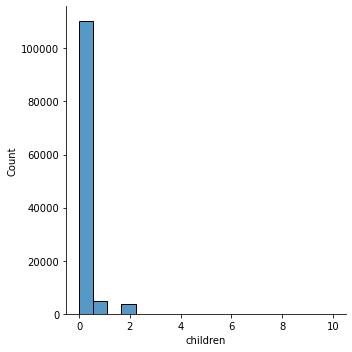

In [26]:
# Displot the overall distribution of children
sns.displot(df['children'])

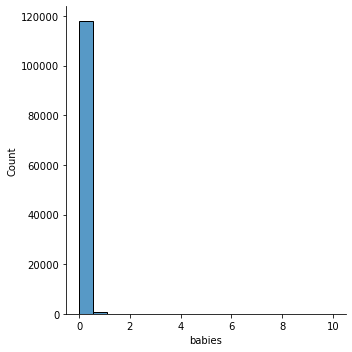

In [27]:
# Displot the overall distribution of babies
sns.displot(df['babies'])

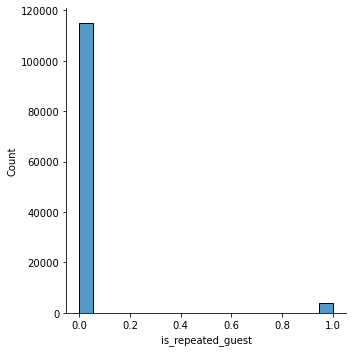

In [28]:
# Displot the overall distribution of is_repeated_guest
sns.displot(df['is_repeated_guest'])

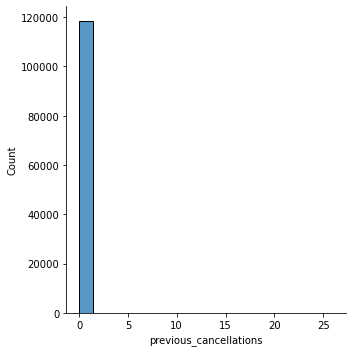

In [29]:
# Displot the overall distribution of previous_cancellations
sns.displot(df['previous_cancellations'])

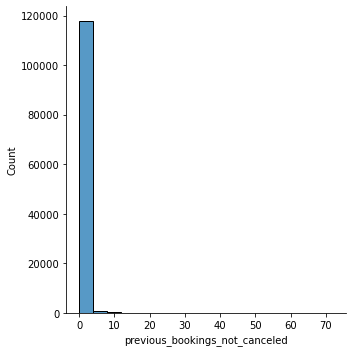

In [30]:
# Displot the overall distribution of previous_bookings_not_canceled
sns.displot(df['previous_bookings_not_canceled'])

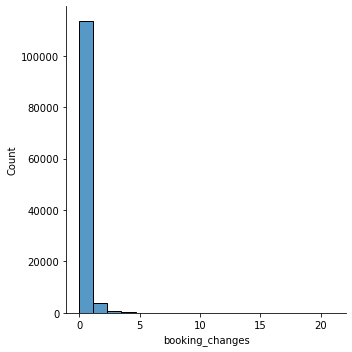

In [31]:
# Displot the overall distribution of booking_changes
sns.displot(df['booking_changes'])

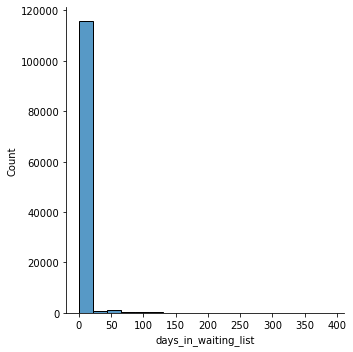

In [32]:
# Displot the overall distribution of days_in_waiting_list
sns.displot(df['days_in_waiting_list'])

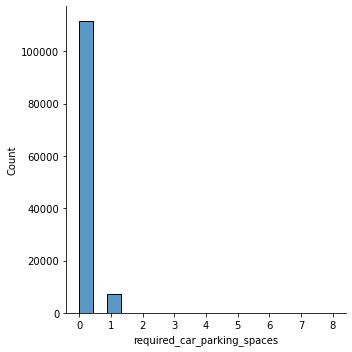

In [33]:
# Displot the overall distribution of required_car_parking_spaces
sns.displot(df['required_car_parking_spaces'])

> **Observation after plotting the distribution for variables that seems to have outliers**<br>
>- children: indeed has outlier issue
>- babies: indeed has outlier issue
>- is_repeated_guest: doesn't have outlier issue since this is a binary variable
>- previous_cancellations: indeed has outlier issue
>- previous_bookings_not_canceled: indeed has outlier issue
>- booking_changes: indeed has outlier issue
>- days_in_waiting_list: indeed has outlier issue
>- required_car_parking_spaces: indeed has outlier issue

> **Setting thresholds for numerical features that has outlier issues:**<br><br>
>- children: < 6
>- babies: < 6
>- previous_cancellations: < 15
>- previous_bookings_not_canceled: < 40
>- booking_changes: < 15
>- days_in_waiting_list: < 200
>- required_car_parking_spaces: < 4

In [34]:
# df.info()

In [35]:
# Remove outliers based on thresholds described above
print('Number of records BEFORE outlier handling:', len(df))
df = df[df['children'] < 6]
df = df[df['babies'] < 6]
df = df[df['previous_cancellations'] < 15]
df = df[df['previous_bookings_not_canceled'] < 40]
df = df[df['booking_changes'] < 15]
df = df[df['days_in_waiting_list'] < 200]
df = df[df['required_car_parking_spaces'] < 4]
print('Number of records AFTER outlier handling:', len(df))

Number of records BEFORE outlier handling: 118898
Number of records AFTER outlier handling: 118501


In [36]:
#df.info()

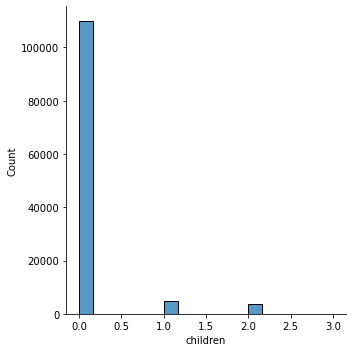

In [37]:
# Displot the overall distribution of children after setting threshold
sns.displot(df['children'])

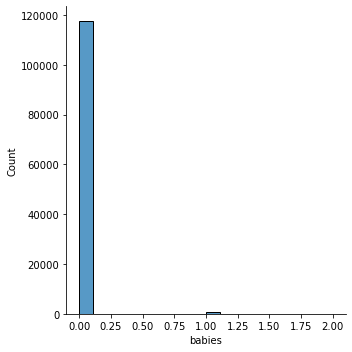

In [38]:
# Displot the overall distribution of babies after setting threshold
sns.displot(df['babies'])

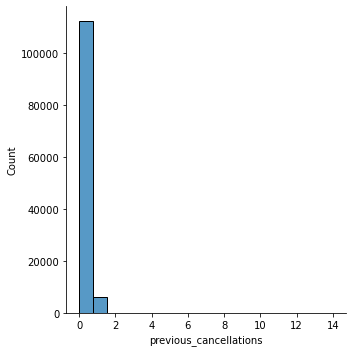

In [39]:
# Displot the overall distribution of previous_cancellations after setting threshold
sns.displot(df['previous_cancellations'])

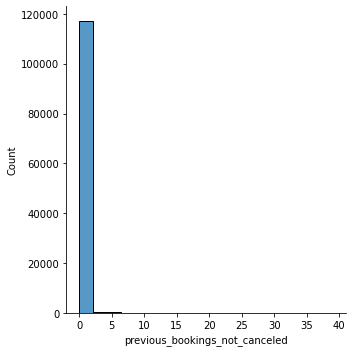

In [40]:
# Displot the overall distribution of previous_bookings_not_canceled after setting threshold
sns.displot(df['previous_bookings_not_canceled'])

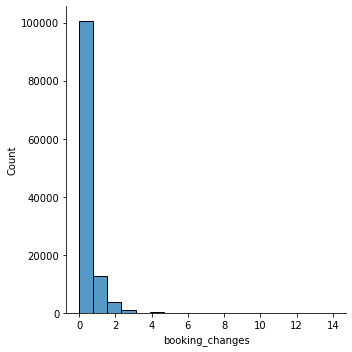

In [41]:
# Displot the overall distribution of booking_changes after setting threshold
sns.displot(df['booking_changes'])

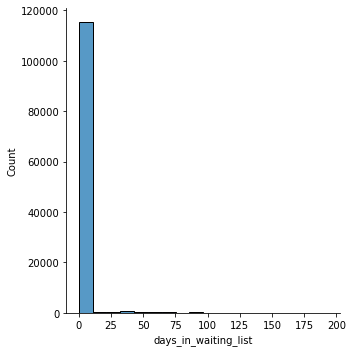

In [42]:
# Displot the overall distribution of days_in_waiting_list after setting threshold
sns.displot(df['days_in_waiting_list'])

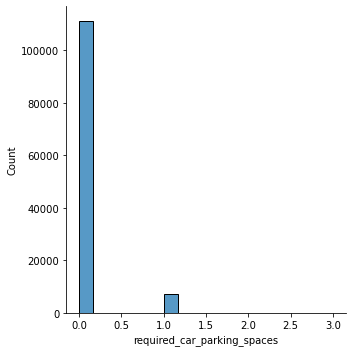

In [43]:
# Displot the overall distribution of required_car_parking_spaces after setting threshold
sns.displot(df['required_car_parking_spaces'])

> **Draw the histogram again after setting threshold for the variables:**<br><br>
>- The histograms are more concentrated after setting the threshold, we hope this could make our model prediction more accurate.

<AxesSubplot:xlabel='is_canceled'>

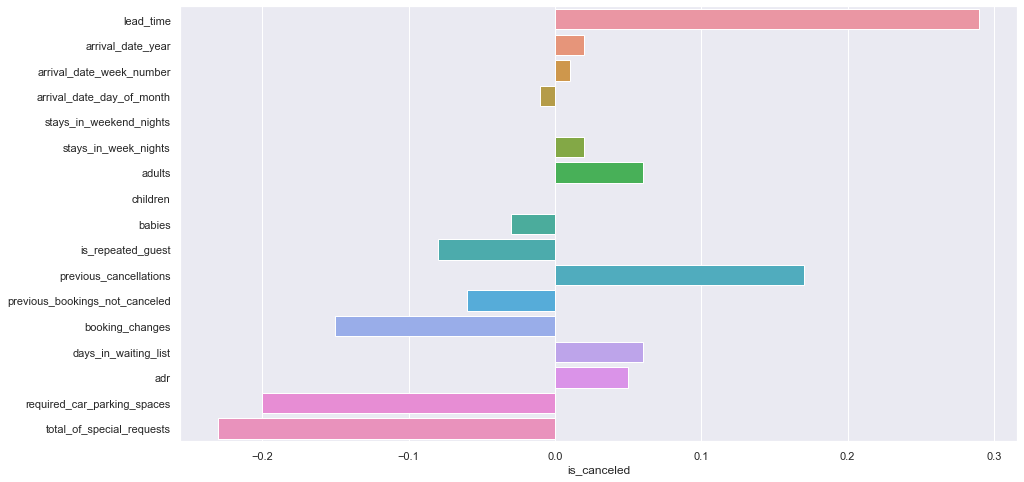

In [44]:
# Find the correlations between our target variable and the remaining numerical features
# Instead of displaying in a heatmap or table, let's drop those values into a horizontal barchart
# for easier viewing
a = df[numerical_vars].corr()[['is_canceled']].round(2)
sns.set(rc= {'figure.figsize':(15,8)})
sns.barplot(x=a.is_canceled[1:],y=a.index[1:],data=a, orient='h')

> **Initial evaluations and observations of numerical features by using barchart:**<br><br>
>The significant correlations between features and is_canceled:
>1. lead_time (+)
>2. previous_cancellations (+)
>3. booking_changes(-)
>4. required_car_parking_spaces(-)
>5. total_of_special_requests(-)

> **Intial evaluations and observations of categorical features:**<br><br>
>The categorical features in the data:
>1. hotel
>2. arrival_date_month
>3. meal
>4. country
>5. market_segment
>6. distribution_channel
>7. reserved_room_type
>8. assigned_room_type
>9. deposit_type
>10. customer_type

In [45]:
#df.info()

In [46]:
# Create temp dataframe with target and categorical variables only
categorical = ['object']
X = pd.merge(df['is_canceled'],df.select_dtypes(include=categorical),left_index=True,right_index=True)

# Compute average target values for all categorical alternatives
target_by_cats(X)

,mean,diff
hotel,,
City Hotel,0.42,0.05
Resort Hotel,0.28,-0.09


,mean,diff
arrival_date_month,,
April,0.41,0.04
August,0.38,0.01
December,0.35,-0.02
February,0.34,-0.03
January,0.31,-0.06
July,0.37,-0.00
June,0.42,0.05
March,0.32,-0.05
May,0.40,0.03


,mean,diff
meal,,
BB,0.37,-0.00
FB,0.57,0.20
HB,0.34,-0.03
SC,0.37,-0.00
Undefined,0.25,-0.12


,mean,diff
country,,
ABW,0.00,-0.37
AGO,0.57,0.20
AIA,0.00,-0.37
ALB,0.17,-0.20
AND,0.71,0.34
...,...,...
VGB,1.00,0.63
VNM,0.25,-0.12
ZAF,0.39,0.02


,mean,diff
market_segment,,
Aviation,0.22,-0.15
Complementary,0.12,-0.25
Corporate,0.19,-0.18
Direct,0.15,-0.22
Groups,0.61,0.24
Offline TA/TO,0.34,-0.03
Online TA,0.37,-0.00


,mean,diff
distribution_channel,,
Corporate,0.22,-0.15
Direct,0.18,-0.19
GDS,0.19,-0.18
TA/TO,0.41,0.04
Undefined,0.00,-0.37


,mean,diff
reserved_room_type,,
A,0.39,0.02
B,0.33,-0.04
C,0.33,-0.04
D,0.32,-0.05
E,0.29,-0.08
F,0.30,-0.07
G,0.37,-0.00
H,0.41,0.04
L,0.33,-0.04


,mean,diff
assigned_room_type,,
A,0.44,0.07
B,0.24,-0.13
C,0.19,-0.18
D,0.25,-0.12
E,0.25,-0.12
F,0.25,-0.12
G,0.31,-0.06
H,0.35,-0.02
I,0.01,-0.36


,mean,diff
deposit_type,,
No Deposit,0.28,-0.09
Non Refund,0.99,0.62
Refundable,0.22,-0.15


,mean,diff
customer_type,,
Contract,0.31,-0.06
Group,0.10,-0.27
Transient,0.41,0.04
Transient-Party,0.25,-0.12


In [47]:
#df.info()

In [48]:
#Find the number of unique value for each categorical features
#df['hotel'].nunique()
#df['arrival_date_month'].nunique()
#df['meal'].nunique()
#df['country'].nunique()
#df['market_segment'].nunique()
#df['distribution_channel'].nunique()
#df['reserved_room_type'].nunique()
#df['assigned_room_type'].nunique()
#df['deposit_type'].nunique()
#df['customer_type'].nunique()

>**Assessment of Categorical Features:**<br><br>
>Features that seem to matter:<br>
>1. **hotel** (2 unique values)
>2. **arrival_date_month** (12 unique values)
>3. **meal** (5 unique values)
>4. **country** (177 unique values): too much unique values
>5. **market_segment** (7 unique values): 
>6. **distribution_channel** (5 unique values)
>7. **reserved_room_type** (10 unique values)
>8. **assigned_room_type** (12 unique values) 
>9. **deposit_type** (3 unique values)
>10. **customer_type** (4 unique values)
<br>

>Drop:<br>
>- We do not drop any categorical features

In [49]:
#df.info()

In [50]:
# Keep top 5 countries and label all the rest as "OTHER"
keep = df['country'].value_counts().index[:5]
df['country'] = np.where(df['country'].isin(keep), df['country'], 'OTHER')

In [51]:
# Create a new version of 'is_canceled' - a log tranformation
#df['is_canceled'] = np.log1p(df['is_canceled'])

# Flag categorical variables and convert to dummies
cat_vars = ['hotel','arrival_date_month','meal',
            'country','market_segment','distribution_channel','reserved_room_type',
            'assigned_room_type', 'deposit_type', 'customer_type'
           ]
for var in cat_vars:
    df[var] = df[var].astype("category")
    
# Conver to dummies
df = pd.get_dummies(df,columns=cat_vars, prefix_sep='_', drop_first=True)

In [52]:
#df.info()

>**Feature Transformation:**<br><br>
>- Target feature(is_canceled): log transformation
>- Other categorical features: for country feature, we keep the top 5 and label all the rest as 'OTHER', and for other features, since their number of unique values are not too many, we decide not to modify it<br>
>-The first category for each categorical variable was dropped<br>

# 4.Training and Testing Model<a class="anchor" id="train-test-model"></a>
* [Go to Top](#table-of-content)

> **Data Partitioning:** <a class="anchor" id="data-split"></a>
<br><br>
>**To Do**:
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

In [53]:
# Target feature is 'is_canceled'
target = ['is_canceled']

# Putting all the features except our target feature into X
X = df.drop(target,axis=1) 

# Putting target feature into y
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

> **Data Normalization:** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [54]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

# 5.Machine Learning<a class="anchor" id="machine-learning"></a>
- [X] [Logistic Regression](#logistic-regression)
- [X] [kNN](#knn)
- [X] [Decision Trees](#decision-trees)
- [X] [Random Forest](#random-forest)
- [X] [Artificial Neural Network](#artificial-neural)
- [X] [Winning Model](#winning-model)
* [Go to Top](#table-of-content)

> **Logistic Regression** <a class="anchor" id="logistic-regression"></a>

In [56]:
lr_model = LogisticRegression()

# Putting our training data into the logistic regression model
lr_model.fit(X_train,y_train.astype(int).values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

# Printing out the training data accuracy and testing data accuracy
print('Training Data Accuracy: ',metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing Data Accuracy: ',metrics.accuracy_score(y_test,y_test_pred_class).round(2))
print('Training Data F1: ',metrics.f1_score(y_train,y_train_pred_class).round(2))
print('Testing Data F1: ', metrics.f1_score(y_test,y_test_pred_class).round(2))
print('Training Data Precision: ', metrics.precision_score(y_train, y_train_pred_class).round(3),)
print('Testing Data Precision: ', metrics.precision_score(y_test, y_test_pred_class).round(3),)

Training Data Accuracy:  0.81
Testing Data Accuracy:  0.81
Training Data F1:  0.72
Testing Data F1:  0.72
Training Data Precision:  0.806
Testing Data Precision:  0.807


/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> **kNN** <a class="anchor" id="knn"></a>

In [57]:
# Train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put TN, TP, FN, FP, Precision, Recall, F1, Accuracy in results object
    results.append({'k':k,
                    'TP':metrics.confusion_matrix(y_test, y_pred_class)[1,1],
                    'TN':metrics.confusion_matrix(y_test, y_pred_class)[0,0],
                    'FP':metrics.confusion_matrix(y_test, y_pred_class)[0,1],
                    'FN':metrics.confusion_matrix(y_test, y_pred_class)[1,0],
                    'Precison':metrics.precision_score(y_test, y_pred_class).round(3),
                    'Recall':metrics.recall_score(y_test, y_pred_class).round(3),
                    'Accuracy':metrics.accuracy_score(y_test,y_pred_class),
                    'F1':metrics.f1_score(y_test, y_pred_class).round(2),
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,TP,TN,FP,FN,Precison,Recall,Accuracy,F1
0,1,10359,19186,3172,2834,0.77,0.79,0.83,0.78
1,3,10066,19405,2953,3127,0.77,0.76,0.83,0.77
2,5,9923,19462,2896,3270,0.77,0.75,0.83,0.76
3,7,9766,19545,2813,3427,0.78,0.74,0.82,0.76
4,9,9651,19644,2714,3542,0.78,0.73,0.82,0.76
5,11,9533,19721,2637,3660,0.78,0.72,0.82,0.75
6,13,9494,19768,2590,3699,0.79,0.72,0.82,0.75
7,15,9431,19814,2544,3762,0.79,0.71,0.82,0.75
8,17,9375,19835,2523,3818,0.79,0.71,0.82,0.75
9,19,9272,19870,2488,3921,0.79,0.70,0.82,0.74


>**Decision:**<br>
Based on the results above, k has the highest accuracy when k = 1, 3, or 5. But 1 and 3 seems to be too low for a classification, so I will set my number of neighbors (k) to 5.<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values.

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

# Print out the training and testing data accuracy, F1, and precision
print('Training Data Accuracy: ',metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing Data Accuracy: ',metrics.accuracy_score(y_test,y_test_pred_class).round(2))
print('Training Data F1: ',metrics.f1_score(y_train,y_train_pred_class).round(2))
print('Testing Data F1: ', metrics.f1_score(y_test,y_test_pred_class).round(2))
print('Training Data Precision: ', metrics.precision_score(y_train, y_train_pred_class).round(3),)
print('Testing Data Precision: ', metrics.precision_score(y_test, y_test_pred_class).round(3),)

Training Data Accuracy:  0.89
Testing Data Accuracy:  0.83
Training Data F1:  0.84
Testing Data F1:  0.76
Training Data Precision:  0.859
Testing Data Precision:  0.774


>**Overfitting evaluation:**<a class="anchor" id="logistic-model"></a>
<br>
>The Training data Accuracy is larger than the Testing data Accuracy in kNN Model, so there might be a overfitting issues but not very significant.

In [59]:
# Performance measurements of kNN Model
class_perf_measures(knn,X_test,y_test)

,Threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,13193,0,22358,0,0.37,1.00,0.37,0.54
1,0.10,12567,12529,9829,626,0.56,0.95,0.71,0.71
2,0.20,12567,12529,9829,626,0.56,0.95,0.71,0.71
3,0.30,11450,16702,5656,1743,0.67,0.87,0.79,0.76
4,0.40,11450,16702,5656,1743,0.67,0.87,0.79,0.76
5,0.50,9923,19462,2896,3270,0.77,0.75,0.83,0.76
6,0.60,8244,21184,1174,4949,0.88,0.62,0.83,0.73
7,0.70,8244,21184,1174,4949,0.88,0.62,0.83,0.73
8,0.80,8244,21184,1174,4949,0.88,0.62,0.83,0.73
9,0.90,6597,22060,298,6596,0.96,0.50,0.81,0.66


> **Decision Trees** <a class="anchor" id="decision-trees"></a>

In [60]:
# Put all the variables except the target variable into x
# X = df.drop(columns=['is_canceled'])

# Put the target variable into y
# y = df['is_canceled'] 

# Call up the decision tree classifier
classTree = DecisionTreeClassifier(random_state=0, max_depth = 10) 
# max_depth is the number of the layers you want the decision tree to have
# random_state is kind of like a random seed, it can make sure that you get the same decision tree every time
# with the same seed, random_state can be any integer

# Fit it with arguments
classTree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(max_depth=10, random_state=0)

In [62]:
y_pred_class_train = classTree.predict(X_train)
y_pred_class_test = classTree.predict(X_test)

# Print out the training and testing data accuracy, F1, and precision
print('Training Data Accuracy: ',metrics.accuracy_score(y_train,y_pred_class_train).round(2))
print('Testing Data Accuracy: ',metrics.accuracy_score(y_test,y_pred_class_test).round(2))
print('Training Data F1: ',metrics.f1_score(y_train,y_pred_class_train).round(2))
print('Testing Data F1: ', metrics.f1_score(y_test,y_pred_class_test).round(2))
print('Training Data Precision: ', metrics.precision_score(y_train, y_pred_class_train).round(3),)
print('Testing Data Precision: ', metrics.precision_score(y_test, y_pred_class_test).round(3),)

Training Data Accuracy:  0.84
Testing Data Accuracy:  0.84
Training Data F1:  0.77
Testing Data F1:  0.77
Training Data Precision:  0.82
Testing Data Precision:  0.816


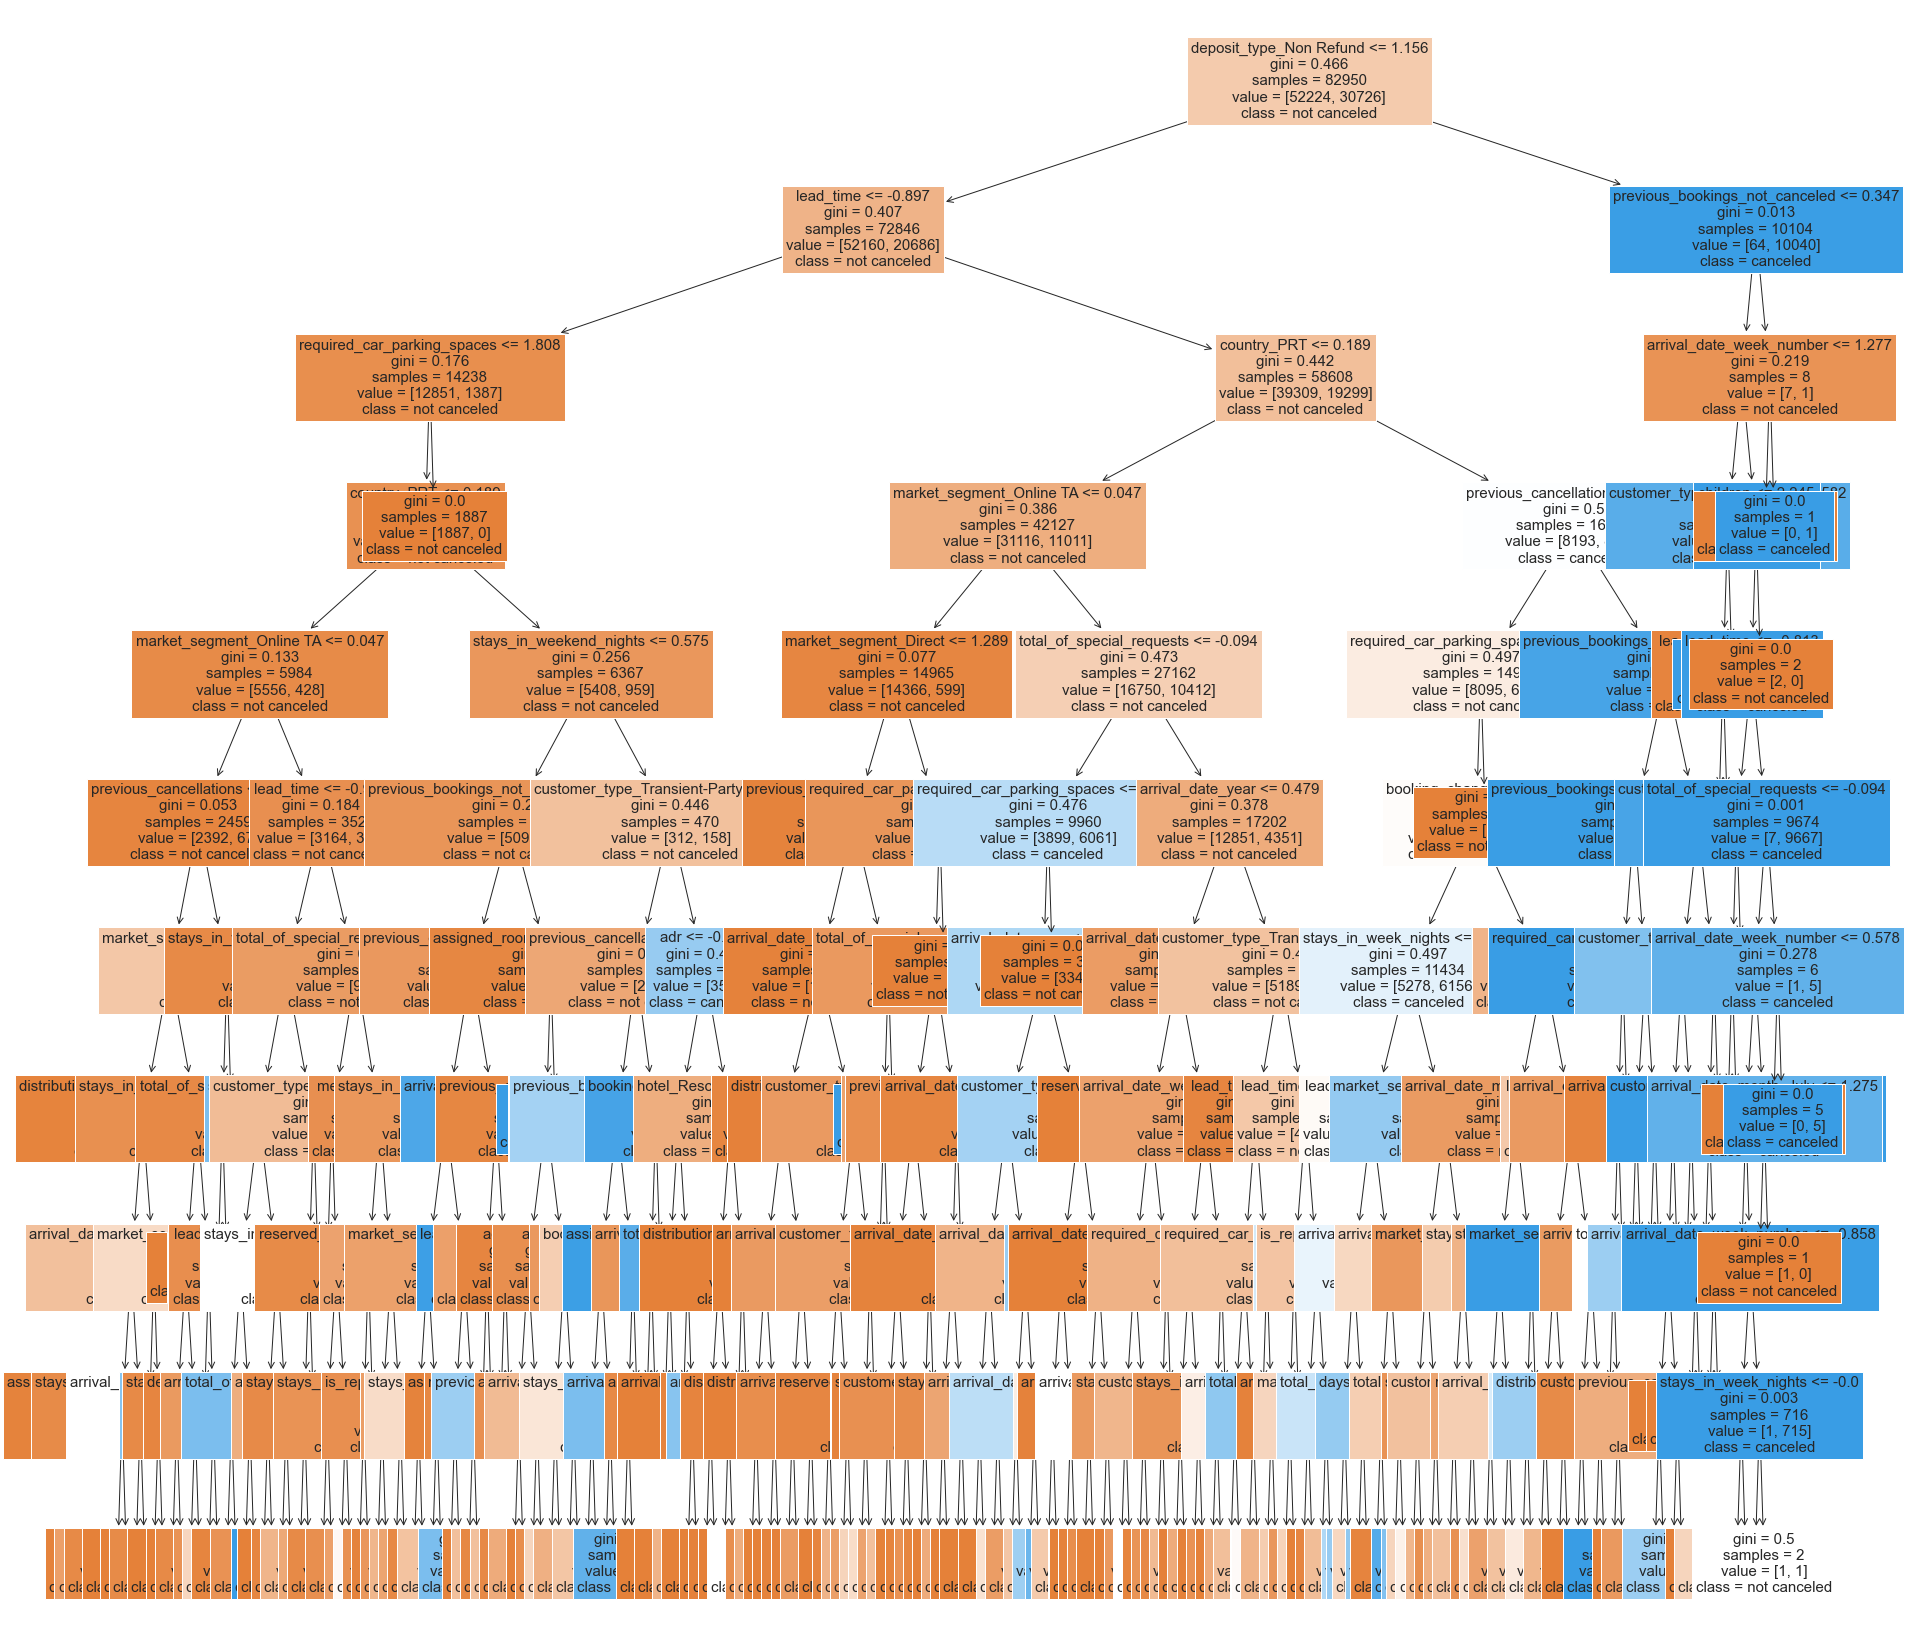

In [63]:
fig = plt.figure(figsize=(30,30)) # plt.figure(figsize(width, height), dpi(dots per inch))
# Plot the decision tree
tree.plot_tree(classTree,
                   feature_names=X.columns,  
                   class_names=['not canceled','canceled'], # 1 is for canceled, 0 is for not canceled
                   filled=True,
                   fontsize=15
                  )
plt.show()

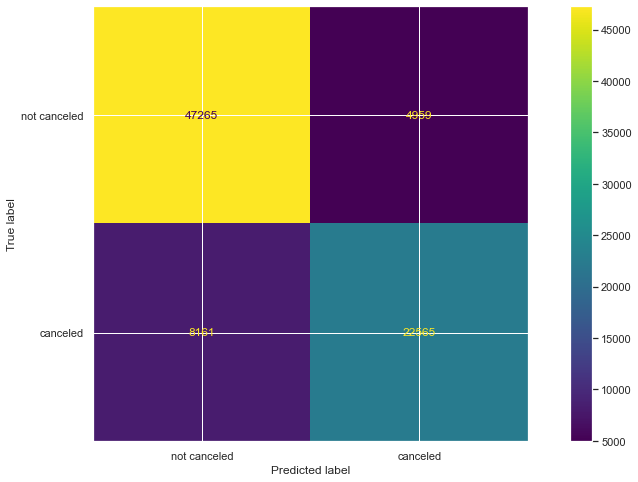

In [64]:
# Decision Tree performance on Training Data
plot_confusion_matrix(classTree,X_train,y_train,
                      display_labels=['not canceled','canceled'])

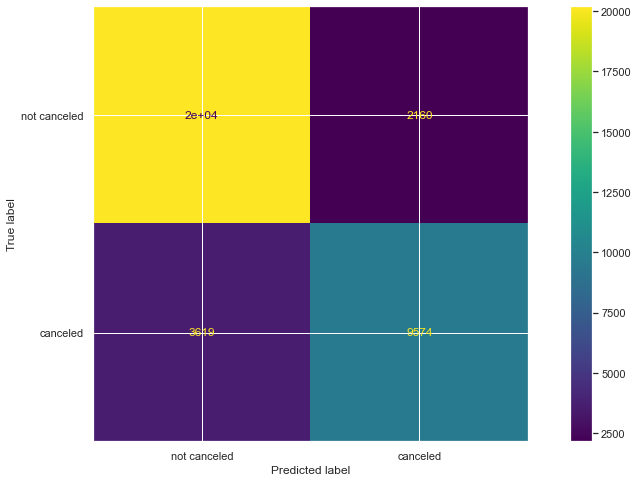

In [70]:
# Decision Tree performance on Testing Data
plot_confusion_matrix(classTree,X_test,y_test,
                      display_labels=['not canceled','canceled'])

In [66]:
# Feature importance, it automatically does feature selection for you
print("Feature Importances:\n{}".format(classTree.feature_importances_))

Feature Importances:
[7.83199472e-02 3.22415082e-02 7.70422179e-03 8.65779193e-04
 2.63357077e-03 1.14091652e-02 2.52550395e-03 1.93603929e-04
 0.00000000e+00 1.53295577e-03 3.74358946e-02 8.47169764e-03
 1.83577898e-02 1.56896607e-03 1.19163150e-02 4.35754217e-02
 8.91571135e-02 1.62600599e-03 8.09810501e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.18565264e-04 0.00000000e+00
 4.25778314e-04 4.10315474e-04 8.68004883e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.39725593e-04
 0.00000000e+00 1.52917351e-03 4.18358469e-05 0.00000000e+00
 4.04905250e-05 6.94940943e-02 3.23220527e-05 2.31374429e-04
 6.84258202e-03 4.19714113e-04 0.00000000e+00 1.15059824e-01
 7.39671670e-05 8.84109951e-05 2.50655631e-04 0.00000000e+00
 1.72625902e-04 0.00000000e+00 0.00000000e+00 4.66831936e-05
 6.53271341e-05 3.43623577e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.94716311e-05
 9.

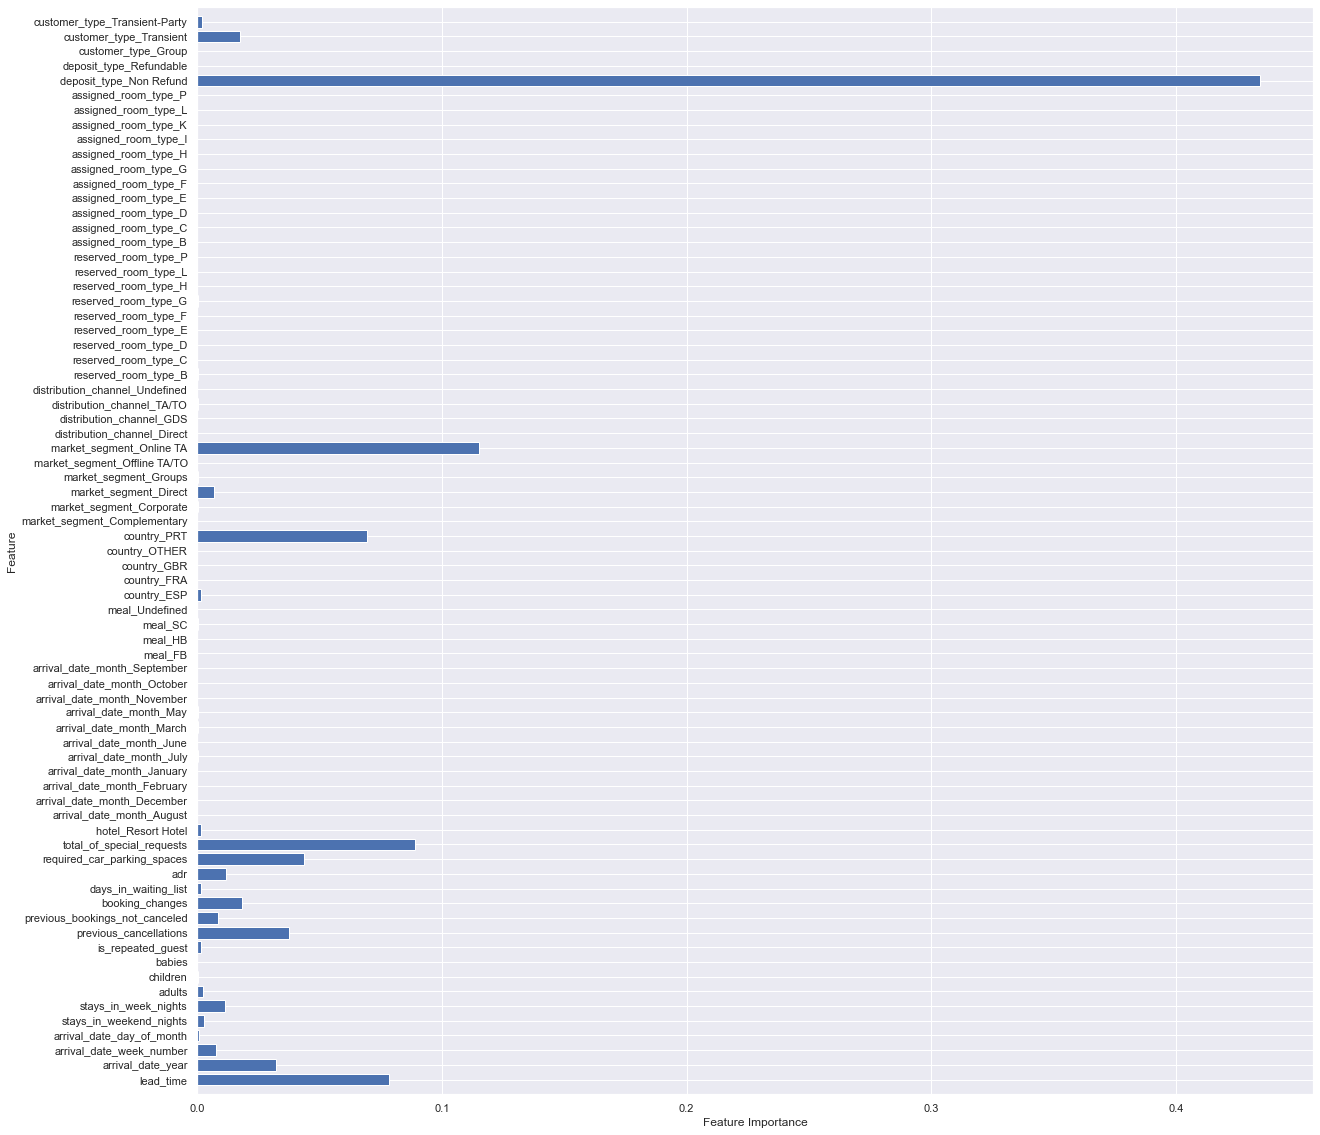

In [67]:
def plot_feature_importances(data,model):
    n_features = data.shape[1]
    fig = plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(X_train,classTree)

> **Features that seems to be important:**
> 1. deposit_type_Non Refund
> 2. market_segment_Online TA
> 3. country_PRT
> 4. total_of_special_requests
> 5. lead_time

> **Random Forest** <a class="anchor" id="random-forest"></a>

In [69]:
classForest = RandomForestClassifier(n_estimators=100, max_depth=10,
                               max_features=20, random_state=0)

# Feed the training data into the model
classForest.fit(X_train,y_train)

# Returns the number of votes for each class
y_pred_prob = classForest.predict_proba(X_test)[:,1]

# [y_pred_prob] is the data matrix to be binarized. threshold is the threshold used to binarize.
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
confusion=confusion_matrix(y_test,y_pred_class)

# Print out the testing data accuracy, F1, and Precision
print('Testing Data Accuracy: ',metrics.accuracy_score(y_test,y_pred_class).round(2))
print('Testing Data F1: ', metrics.f1_score(y_test,y_pred_class).round(2))
print('Testing Data Precision: ', metrics.precision_score(y_test, y_pred_class).round(3),)

/var/folders/qn/b83j31g56rg2d51wzvlbt_n00000gn/T/ipykernel_37181/1738762438.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classForest.fit(X_train,y_train)


Testing Data Accuracy:  0.85
Testing Data F1:  0.78
Testing Data Precision:  0.846


> **Artificial Neural Network** <a class="anchor" id="artificial-neural"></a>

In [68]:
classNeural = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000,
                      activation='tanh',
                      alpha=.01
                     )
# Feed the training data into the model
classNeural.fit(X_train,y_train)

# Returns the number of votes for each class
y_pred_prob = classNeural.predict_proba(X_test)[:,1]
y_pred_prob_train = classNeural.predict_proba(X_train)[:,1]

# [y_pred_prob] is the data matrix to be binarized. threshold is the threshold used to binarize.
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
y_pred_class_train = binarize([y_pred_prob_train],threshold=0.5)[0]

# Confusion matrix for testing and training data
confusion_test=confusion_matrix(y_test,y_pred_class)
confusion_train=confusion_matrix(y_train,y_pred_class_train)

# Print out the training and testing data accuracy, F1, and precision
print('Training Data Accuracy: ',metrics.accuracy_score(y_train,y_pred_class_train).round(2))
print('Testing Data Accuracy: ',metrics.accuracy_score(y_test,y_pred_class).round(2))
print('Training Data F1: ',metrics.f1_score(y_train,y_pred_class_train).round(2))
print('Testing Data F1: ', metrics.f1_score(y_test,y_pred_class).round(2))
print('Training Data Precision: ', metrics.precision_score(y_train, y_pred_class_train).round(3),)
print('Testing Data Precision: ', metrics.precision_score(y_test, y_pred_class).round(3),)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training Data Accuracy:  0.88
Testing Data Accuracy:  0.86
Training Data F1:  0.84
Testing Data F1:  0.81
Training Data Precision:  0.861
Testing Data Precision:  0.832


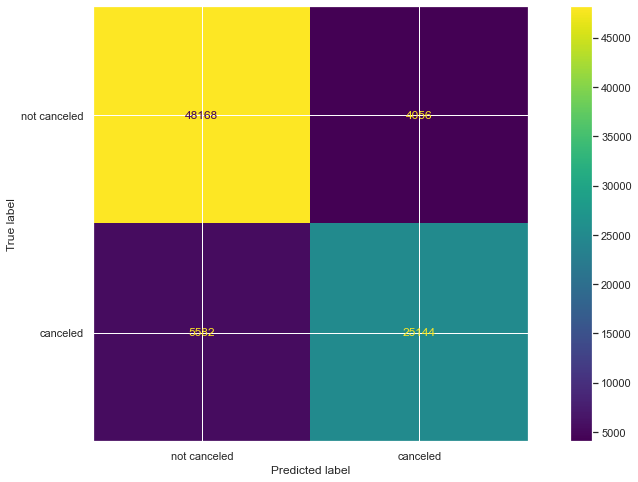

In [71]:
#  Artificial Neural Network performance on Training Data
plot_confusion_matrix(classNeural,X_train,y_train,
                      display_labels=['not canceled','canceled'])

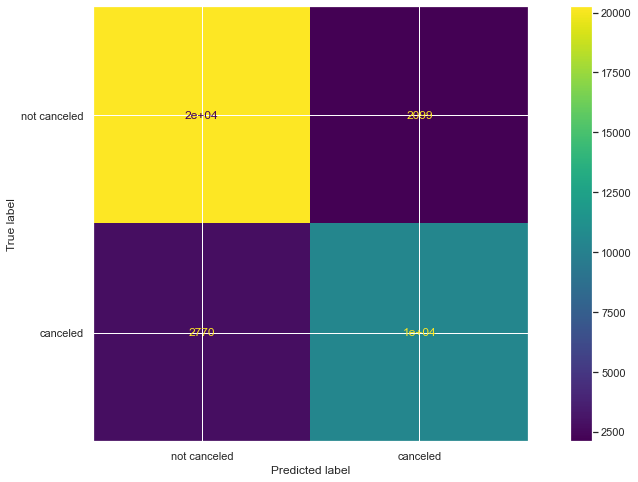

In [72]:
#  Artificial Neural Network performance on Testing Data
plot_confusion_matrix(classNeural,X_test,y_test,
                      display_labels=['not canceled','canceled'])

>**Interpretations of the Confusion Matrix(Booking Cancellations):**
<br>
>1. We make positive class(1) as booking canceled and negative class(0) as booking not canceled.<br>
>2. TP(True Positive): Predict the booking will be canceled and the booking actually be canceled.<br>
>3. TN(True Negative): Predict the booking will not be canceled and the booking actually does not be canceled.<br>
>4. FP(False Positive): Predict the booking will be canceled but the booking actually does not be canceled.<br>
>5. FN(False Negative): Predict the booking will not be canceled but booking actually be canceled.<br>
>6. Precison: TP/(TP+FP)
>7. Recall: TP/(TP+FN)
>8. Accuracy: (TP+TN)/n
>9. ErrorRate: (FP+FN)/n
>10. For this case, FP(False Positives) are the costliest so we want to focus on Precision.

> **Winning Model:** Artificial Neural Network <a class="anchor" id="winning-model"></a>
<br>

| Model                      | Testing Data Accuracy | Testing Data F1 | Testing Data Precision |
|----------------------------|-----------------------|-----------------|------------------------|
| Logistic Regression:  	 |  0.81                 | 0.72            | 0.807                  |
| kNN:	                     |  0.83                 | 0.76            | 0.774                  |
| Decision Trees:	         |  0.84                 | 0.77            | 0.816                  |
| Random Forest:	         |  0.85                 | 0.78            | 0.846                  |
| Artificial Neural Network: |  0.86                 | 0.81            | 0.832                  |

>Artificial Neural Network has the highest data accuracy and F1, and its data precision has a good performance compared to other models, so Artificial Neural Network is our final winning model.<br>

>The run-time for kNN model is the longest, it ran about 10 minutes.

>**Recommendations:** For the Artificial Neural Network Model, the training data performance of Accuracy, F1, and Precision are all better than the testing data. So there might be some overfitting issues but not very significant. 
Random Forest model is also a good model to choose since it has the largest precision, which hotels might want to focus on.

# 6.References and Sources<a class="anchor" id="references-sources"></a>
* [Go to Top](#table-of-content)

>1. **Picture in Problem Introduction and Movitation:** https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3ylTGhVpMiubpl-WG-fsFAQZum4dKBY7N2Vti2k5rj0G5emUzeID-BVFSIzTmFAMMmmw&usqp=CAU<br>
>2. 